## Notebook analysing data printed by the tested android device at TÜV-Nord
The .txt files in the data directory contain printed information of an android device. This needs to be categorized, clustered and finally analyzed and compared to the _VBOX_ data in the **CrashAnalytics** Notebook.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
matplotlib.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (14.0, 11.0)

from LogReader import read_device_log, device_log_to_sensordata
from SensorData import add_speed
from Filter import g_h_filter, k_filter

In [2]:
file_name = 'data/tuev1 CA Mini.txt'

In [3]:
res = read_device_log(file_name)

### Full plot of acceleration data for each axis

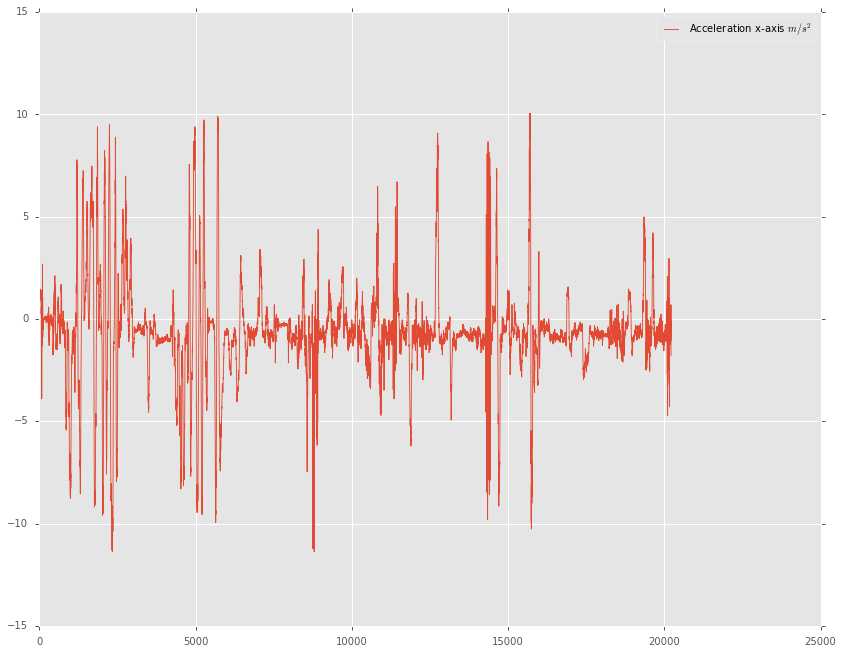

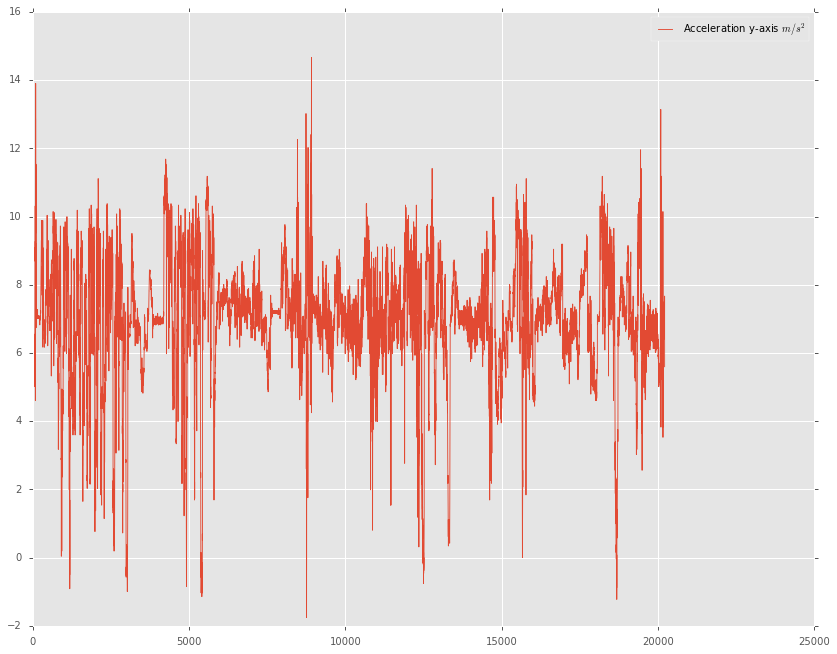

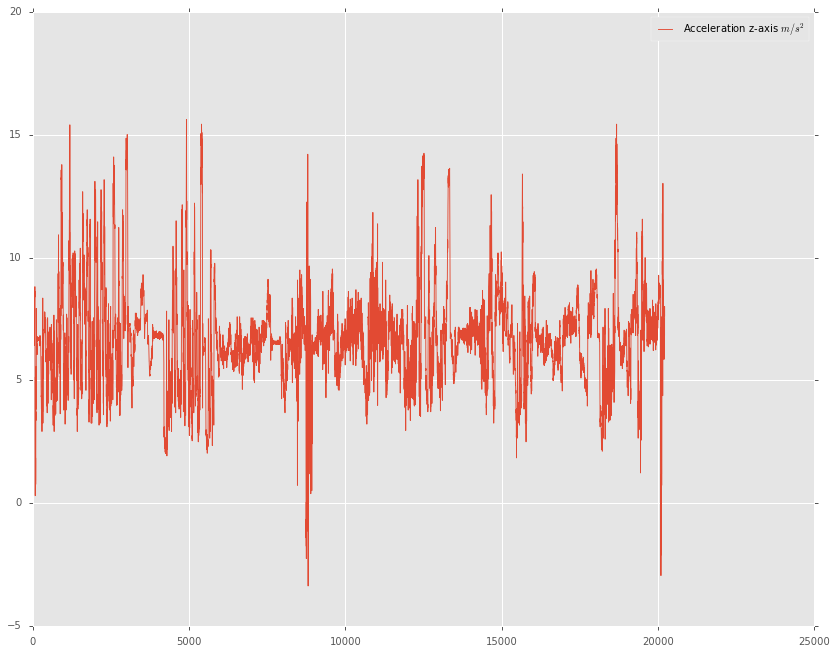

In [9]:
plt.plot(res['acc_x'], linewidth=0.9, label='Acceleration x-axis $m/s^2$')
plt.legend()
plt.show()
plt.plot(res['acc_y'], linewidth=0.9, label='Acceleration y-axis $m/s^2$')
plt.legend()
plt.show()
plt.plot(res['acc_z'], linewidth=0.9, label='Acceleration z-axis $m/s^2$')
plt.legend()
plt.show()

### Plotting data based on accumulated sensor data per second

In [5]:
sensors = device_log_to_sensordata(file_name)
add_speed(sensors)
norm = min([x.time for x in sensors])
times = [t.time - norm for t in sensors]

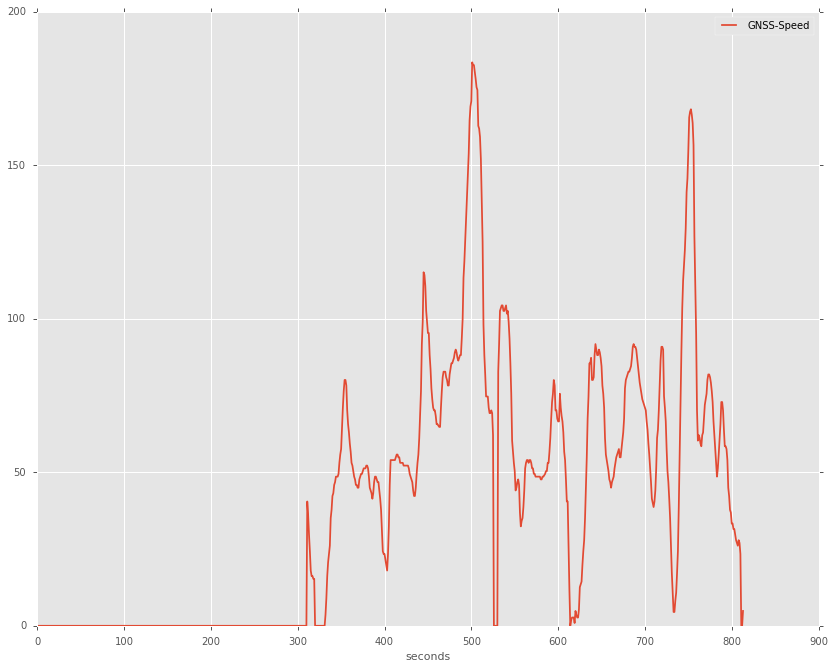

In [6]:
plt.plot(times, [s.speed for s in sensors], label='GNSS-Speed')
plt.xlabel('seconds')
plt.legend()
plt.show()

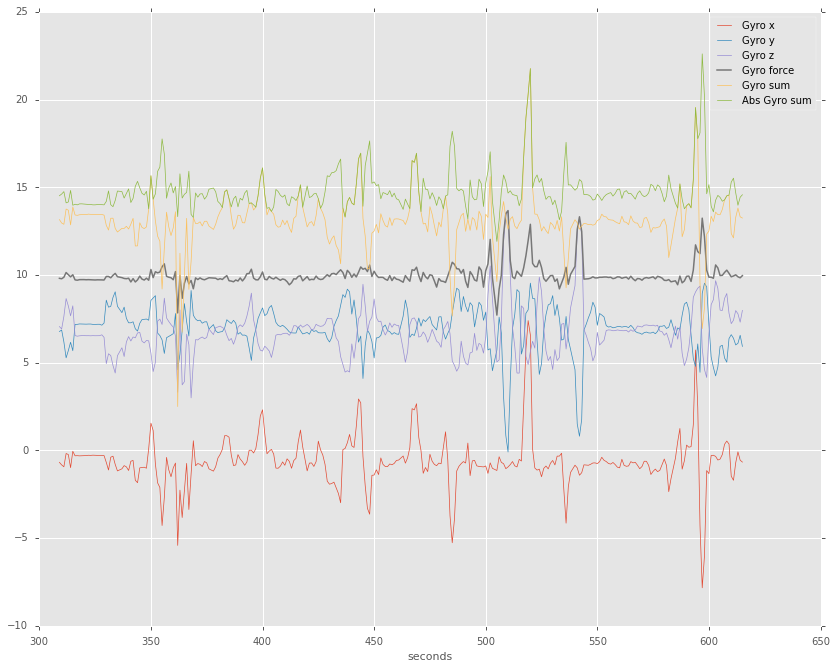

In [7]:
start, end = 300, 600
gyro = [s for s in sensors[start:end]]
t = times[start:end]
plt.plot(t, [s.x for s in gyro], linewidth=0.7, label='Gyro x')
plt.plot(t, [s.y for s in gyro], linewidth=0.7, label='Gyro y')
plt.plot(t, [s.z for s in gyro], linewidth=0.7, label='Gyro z')
plt.plot(t, [s.gyro_force() for s in gyro], linewidth=1.5, label='Gyro force')
plt.plot(t, [s.gyro_sum() for s in gyro], linewidth=0.7, label='Gyro sum')
plt.plot(t, [s.gyro_abs_sum() for s in gyro], linewidth=0.7, label='Abs Gyro sum')
plt.legend()
plt.xlabel('seconds')
plt.show()

### Filter Experiments with g-h and Kalman

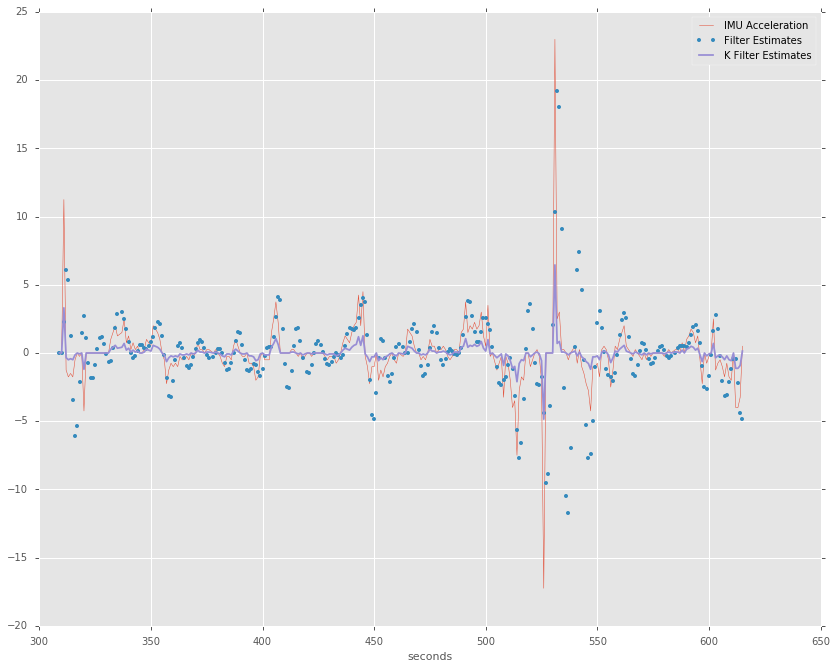

In [8]:
start, end = 300, 600
t = times[start:end]
accs = [s.acc for s in sensors[start:end]]
plt.plot(t, accs, label='IMU Acceleration', linewidth=0.5)
plt.plot(t, [est for est in g_h_filter(accs, 0, 0, 0.2, 0.5, 1.)], 'o', label='Filter Estimates', markersize=4.0)
plt.plot(t, [est for est in k_filter(accs, 0., 1.0, 1.0, 4.0)], label='K Filter Estimates')
plt.xlabel('seconds')
plt.legend()
plt.show()